# Install Libraries

In [ ]:
pip install -U requests

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U bitsandbytes

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U git+https://github.com/huggingface/transformers.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-71hebemy
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-71hebemy
  Resolved https://github.com/huggingface/transformers.git to commit 7a7f27697ad17d4ff03dbe203095be8b71759b55
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U git+https://github.com/huggingface/peft.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/huggingface/peft.git to /tmp/pip-req-build-_wl3cs2p
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft.git /tmp/pip-req-build-_wl3cs2p
  Resolved https://github.com/huggingface/peft.git to commit 3f9ce553e21569e21269b5ba91d7390f7229199a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U git+https://github.com/huggingface/accelerate.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/huggingface/accelerate.git to /tmp/pip-req-build-_jqslh9u
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate.git /tmp/pip-req-build-_jqslh9u
  Resolved https://github.com/huggingface/accelerate.git to commit 60461ff7c479b9ea60757ec18279ad3cf84d29cb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U datasets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install newsapi-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Load Disease Table

In [1]:
import json
with open('diseases.json', 'r') as f:
    # Load the JSON data from the file
    disease_table = json.load(f)

# Query API

In [2]:
import requests
filter_key = ['whooping', 'Fever', 'mpox', 'coli']
url = f"https://newsapi.org/v2/top-headlines?country=us&category=health&pageSize=100&apiKey=38a5c18e23b04ed387b8c60f83bf0b37"
response = requests.get(url)
if response.status_code == 200:
    articles = response.json().get("articles", [])
    #print(articles)
else:
    print(f"Error: {response.status_code}, {response.text}")

for id in filter_key:
    url = f"https://newsapi.org/v2/everything?q={id}&language=en&apiKey=38a5c18e23b04ed387b8c60f83bf0b37"
    response = requests.get(url)
    if response.status_code == 200:
        articles.extend(response.json().get("articles", []))
        #print(response.json().get("articles"))
    else:
        print(f"Error: {response.status_code}, {response.text}")

# NER for disease/location keywords

In [3]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

loc_ner = pipeline("ner", model=model, tokenizer=tokenizer)
med_ner = pipeline("token-classification", model="blaze999/Medical-NER")
example = "Long COVID can strike anyone, rich or poor, but a growing body of evidence suggests poor and middle income Americans like Rick Henline suffer most."
loc_results = loc_ner(example)
med_results = med_ner(example)
print(loc_results)
print(med_results)

/common/software/install/manual/pytorch/2.1.2-pyclustertend/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/common/software/install/manual/pytorch/2.1.2-pyclustertend/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2024-12-12 09:30:51.853627: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-12 09:30:51.853671: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been 

[{'entity': 'B-MISC', 'score': 0.99930394, 'index': 24, 'word': 'Americans', 'start': 107, 'end': 116}, {'entity': 'B-PER', 'score': 0.9997677, 'index': 26, 'word': 'Rick', 'start': 122, 'end': 126}, {'entity': 'I-PER', 'score': 0.9995826, 'index': 27, 'word': 'He', 'start': 127, 'end': 129}, {'entity': 'I-PER', 'score': 0.97837, 'index': 28, 'word': '##n', 'start': 129, 'end': 130}, {'entity': 'I-PER', 'score': 0.97271055, 'index': 29, 'word': '##line', 'start': 130, 'end': 134}]
[{'entity': 'B-DETAILED_DESCRIPTION', 'score': 0.13359489, 'index': 1, 'word': '▁Long', 'start': 0, 'end': 4}, {'entity': 'I-DISEASE_DISORDER', 'score': 0.1001186, 'index': 3, 'word': 'VID', 'start': 7, 'end': 10}, {'entity': 'I-DETAILED_DESCRIPTION', 'score': 0.209616, 'index': 22, 'word': '▁income', 'start': 99, 'end': 106}]


In [4]:
# Function to reconstruct entities
import re
def extract_target_entity(entities):
    target_words = []
    start_flag = True
    disease =""
    for entity in entities:
        if entity['score'] < 0.1:
            continue
        # Check if entity type matches the target type
        if entity['entity']=='B-DISEASE_DISORDER':
            if disease != "":
                target_words.append(disease)
            disease = entity['word'].lstrip('▁')
        elif entity['entity']=='I-DISEASE_DISORDER':
            if re.search("\▁", entity['word']):
                #print(f"found __{entity['word']}")
                disease = disease + " " + entity['word'].lstrip('▁')
            else:
                #print(f"not found __{entity['word']}")
                disease = disease + entity['word'].lstrip('▁')
        elif entity['entity'] =='B-DIAGNOSTIC_PROCEDURE':
            disease = entity['word'].lstrip('▁')
        elif entity['entity'] == 'I-DIAGNOSTIC_PROCEDURE':
            if re.search("\▁", entity['word']):
                #print(f"found __{entity['word']}")
                disease = disease + " " + entity['word'].lstrip('▁')
            else:
                #print(f"not found __{entity['word']}")
                disease = disease + entity['word'].lstrip('▁')
        else:
            start_flag = False
            if disease != "":
                target_words.append(disease)
            disease = ""
    if disease!="":
        target_words.append(disease)

    # Combine captured words into a single string
    return target_words

# Extract target entity
diseases = extract_target_entity(med_results)
print(diseases)

['VID']


In [5]:
def lookup_disease_symptoms(disease, disease_table):
    found_flag = False
    for disease_name in disease_table.keys():
        # Use regex to split by parentheses
        #names = re.split(r'\s*\(|\)\s*', disease_name)
        names = [name.strip() for name in re.split(r'\s*\(|\)\s*', disease_name) if name.strip()]

        # Remove empty strings from the result
        sub_names = [sub_name for sub_name in names if sub_name]
        #print(sub_names)
        if any(key.lower() in disease.lower() for key in sub_names):
            found_flag = True
            break
    if not found_flag:
        return None
    return disease_name
name = lookup_disease_symptoms(diseases[0], disease_table)

In [6]:
from IPython.display import display, HTML
def get_entities(location_words, diseases):
    entities = []
    loc_dict = {"Location": "US", "color": "lightgreen"}
    disease_dict = {"Disease": "", "color": "lightblue"}
    for disease in diseases:

        # Find disease keywords

        name = lookup_disease_symptoms(disease, disease_table)
        if lookup_disease_symptoms(disease, disease_table) is None:
            continue
        else:
            disease_dict["Symptom"] = disease_table[name]
            disease_dict["Name"] = name
        #if not any(disease.lower() in key.lower() for key in disease_table.keys()):
        #    continue
        disease_dict["Disease"] = disease
        entities.append(disease_dict)
        # Default location to US
        if len(location_words) == 0:
            entities.append(loc_dict)
        for location in location_words:
            loc_dict["Location"] = location
            entities.append(loc_dict)
    #print(f"[ENTITIES]:{entities}")
    return entities

# Function to highlight entities
def highlight_entities(text, entities):
    for entity in entities:
        if 'Disease' in entity:
            word = entity['Disease']
        else:
            word = entity['Location']
        color = entity['color']
        # Wrap word with a span tag with background color
        text = text.replace(
            word,
            f"<span style='background-color: {color}; padding: 2px;'>{word}</span>"
        )
    # Display the highlighted text in JupyterLab
    display(HTML(text))
location_words = [entity['word'] for entity in loc_results if entity['entity'] == 'B-LOC']
entities = get_entities(location_words, diseases)
highlight_entities(example, entities)

In [7]:
headlines_lst = []
descriptions_lst = []
diseases_lst = []
headlines_list = []
for a in articles:
    ### parsing from title
    if (a['title'] == "[Removed]") | (a['title'] is None):
        continue
    loc_results = loc_ner(a['title'])
    med_results = med_ner(a['title'])
    diseases=extract_target_entity(med_results)
    location_words = [entity['word'] for entity in loc_results if entity['entity'] == 'B-LOC']
    entities = get_entities(location_words, diseases)
    if len(entities) == 0:
        continue
    #print("#######")
    entities[0]['title'] = a['title']
    entities[0]['PublishAt'] = a['publishedAt']
    entities[0]['url'] = a['url']
    #print(entities)
    #print("[PublishAt]:")
    #print(a['publishedAt'])
    #print(f"[TITLE]:")
    highlight_entities(a['title'], entities)
    headlines_list.append(entities)
    ### parsing from description
    if (a['description'] == "[Removed]") | (a['description'] is None):
        continue
    loc_results = loc_ner(a['description'])
    med_results = med_ner(a['description'])
    diseases=extract_target_entity(med_results)
    location_words = [entity['word'] for entity in loc_results if entity['entity'] == 'B-LOC']
    entities = get_entities(location_words, diseases)
    if len(entities) == 0:
        continue
    #print(entities)
    #print(f"[DESCRIPTION]:")
    highlight_entities(a['description'], entities)
    #print("[URL]:")
    #print(a['url'])
    headlines_list.append(entities)
    headlines_lst.append(a["title"])
    descriptions_lst.append(a["description"])
    diseases_lst.append(entities[0]["Disease"])

# Dataset evaluation
## Headlines

In [8]:
from datasets import Dataset
import numpy as np

n_datapoints = len(descriptions_lst)

instructions_lst_np = np.array(["You are a doctor trying to determine what disease outbreak may be occuring based on a news headline. You will be given a headline, and you have to say your prediction of what the disease is" for _ in range(n_datapoints)])
descriptions_lst_np = np.array(headlines_lst)
diseases_lst_np = np.array(diseases_lst)

permutator = np.random.permutation(n_datapoints)

shuffled_instructions = instructions_lst_np[permutator]
shuffled_descriptions = descriptions_lst_np[permutator]
shuffled_diseases = diseases_lst_np[permutator]

train_instructions = shuffled_instructions[:int(n_datapoints * 0.8)]
train_descriptions = shuffled_descriptions[:int(n_datapoints * 0.8)]
train_diseases = shuffled_diseases[:int(n_datapoints * 0.8)]

eval_instructions = shuffled_instructions[int(n_datapoints * 0.8):]
eval_descriptions = shuffled_descriptions[int(n_datapoints * 0.8):]
eval_diseases = shuffled_diseases[int(n_datapoints * 0.8):]

train_dataset_dict = {
    "instruction": train_instructions,
    "input": train_descriptions,
    "output": train_diseases
}
eval_dataset_dict = {
    "instruction": eval_instructions,
    "input": eval_descriptions,
    "output": eval_diseases
}

train_headline_dataset = Dataset.from_dict(train_dataset_dict)
eval_headline_dataset = Dataset.from_dict(eval_dataset_dict)

# show the current diseases on headlines

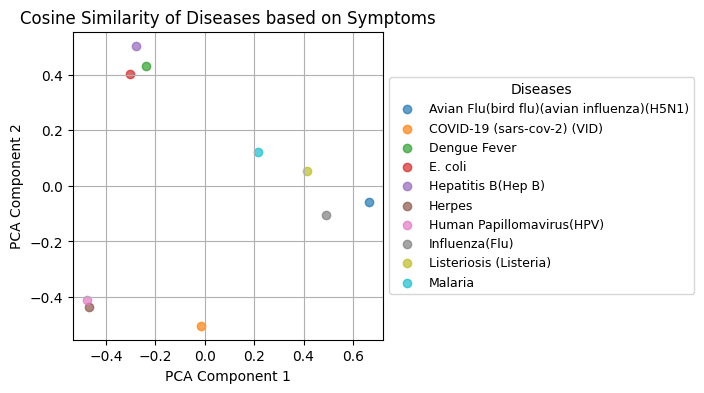

In [9]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data=headlines_list
#new_symptom = 'running nose, fever and cough'
diseases_lst = [entry[0]['Name'] for entry in data]
diseases_lst = np.unique(diseases_lst)
symptoms_lst = [disease_table[disease] for disease in diseases_lst[:10]]
#symptoms_lst = np.append(symptoms_lst, new_symptom)

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(symptoms_lst)

pca_transformer = PCA(n_components=2)
reduced_coords = pca_transformer.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(4, 4))
for i, disease in enumerate(diseases_lst[:10]):
    plt.scatter(reduced_coords[i, 0], reduced_coords[i, 1], label=disease, alpha=0.7)
#new_symptom_coords = reduced_coords[-1]  # Get the last coordinate for the new symptom
#plt.scatter(new_symptom_coords[0], new_symptom_coords[1], color='red', label=new_symptom, alpha=0.7)

plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),  # Anchor legend box outside the plot
    title="Diseases",
    fontsize=9,
    title_fontsize=10
)

plt.title("Cosine Similarity of Diseases based on Symptoms")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Find closest diseases on the headlines

In [40]:
from sklearn.metrics.pairwise import cosine_similarity
def find_similiar_disease(query):

    new_symptom_vector = vectorizer.transform([query])  # Transform new symptom

    # Calculate cosine similarities
    similarities = cosine_similarity(new_symptom_vector, tfidf_matrix).flatten()

    # Find the closest disease
    closest_disease_index = similarities.argmax()
    
    if max(similarities) < 0.5:
        return None
    closest_disease = diseases_lst[closest_disease_index]

    # Find the URL
    url = None
    title = None
    publish_time = None
    for entry in headlines_list:
        if entry[0].get('Name') == closest_disease:
            title = entry[0].get('title')
            publish_time = entry[0].get('PublishAt')
            url = entry[0].get('url')
            break
    reference_text = f"\n\nWe found a similar outbreak of {closest_disease} in your region from the news: \n{title}, \npublished at: {publish_time}\nMore information: {url}"

    # Print results
    #print("Cosine Similarities:", dict(zip(diseases_lst, similarities)))
    return reference_text


## Integrated conversations from Icliniq

In [49]:
n_datapoints = 500
# Read the JSON file
with open('iCliniq.json', 'r') as file:
    icliniq = json.load(file)
icliniq_input = []
icliniq_output = []
# Access the `input` key from each dictionary
for idx, entry in enumerate(icliniq[:n_datapoints]):
    icliniq_input.append(entry['input'])
    res = find_similiar_disease(entry['input'])
    if res is not None:
        res = entry['answer_icliniq']+res
    else:
        res = entry['answer_icliniq']
    icliniq_output.append(res)
icliniq_instructions_lst_np = np.array(["If you are a doctor, please answer the medical questions based on the patient's description." for _ in range(n_datapoints)])
icliniq_descriptions_lst_np = np.array(icliniq_input)
icliniq_diseases_lst_np = np.array(icliniq_output)

icliniq_eval_dataset_dict = {
    "instruction": icliniq_instructions_lst_np,
    "input": icliniq_descriptions_lst_np,
    "output": icliniq_diseases_lst_np
}

#train_icliniq_dataset = Dataset.from_dict(icliniq_train_dataset_dict)
eval_icliniq_dataset = Dataset.from_dict(icliniq_eval_dataset_dict)

# Intergration with ChatDoctor

In [12]:
import torch
torch.cuda.empty_cache()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [13]:
from datasets import load_dataset, load_from_disk

dataset = load_from_disk("patients_query_sampled/")

train_conversation_dataset = dataset['train']
eval_conversation_dataset = dataset['test']

### 2. Load Base Model

Let's now load Mistral - mistralai/Mistral-7B-v0.1 - using 4-bit quantization!

In [14]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(base_model_id, quantization_config=bnb_config, resume_download=True)

/users/7/ho000199/.local/lib/python3.9/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

### 3. Tokenization

Set up the tokenizer. Add padding on the left as it [makes training use less memory](https://ai.stackexchange.com/questions/41485/while-fine-tuning-a-decoder-only-llm-like-llama-on-chat-dataset-what-kind-of-pa).


For `model_max_length`, it's helpful to get a distribution of your data lengths. Let's first tokenize without the truncation/padding, so we can get a length distribution.

In [15]:
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_side="left",
    add_eos_token=True,
    add_bos_token=True,
)
tokenizer.pad_token = tokenizer.eos_token

In [16]:
def headline_formatting_func(example):
    text = f"### The following is a headline about a disease outbreak and what that disease is: \n### Headline: {example['input']} \n### Disease: {example['output']}"
    return text
def headline_generate_and_tokenize_prompt(prompt):
    return tokenizer(headline_formatting_func(prompt))

def conversation_formatting_func(example):
    text = f"### The following is a doctor's opinion on a person's query: \n### Patient query: {example['input']} \n### Doctor opinion: {example['output']}"
    return text
def conversation_generate_and_tokenize_prompt(prompt):
    return tokenizer(conversation_formatting_func(prompt))

def integrate_formatting_func(example):
    text = f"### The following is doctor's suggestions with search of alert outbreak in the region: \n### Patient query: {example['input']} \n### Doctor opinion: {example['output']}"
    return text
def integrate_generate_and_tokenize_prompt(prompt):
    return tokenizer(integrate_formatting_func(prompt))
#train_dataset["output"]

Reformat the prompt and tokenize each sample:

In [17]:
tokenized_train_headline_dataset = train_headline_dataset.map(headline_generate_and_tokenize_prompt)
tokenized_eval_headline_dataset = eval_headline_dataset.map(headline_generate_and_tokenize_prompt)

tokenized_train_conversation_dataset = train_conversation_dataset.map(conversation_generate_and_tokenize_prompt)
tokenized_val_conversation_dataset = eval_conversation_dataset.map(conversation_generate_and_tokenize_prompt)

#tokenized_train_icliniq_dataset = train_icliniq_dataset.map(integrate_generate_and_tokenize_prompt)
tokenized_val_icliniq_dataset = eval_icliniq_dataset.map(integrate_generate_and_tokenize_prompt)

Map:   0%|          | 0/52 [00:00<?, ? examples/s]

Map:   0%|          | 0/13 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [18]:

from datasets import concatenate_datasets

n_headline_train_datapoints = len(tokenized_train_headline_dataset)
n_conversation_train_datapoints = len(tokenized_train_conversation_dataset)

tokenized_train_overall_dataset = concatenate_datasets([tokenized_train_headline_dataset for _ in range(max(1, n_conversation_train_datapoints // n_headline_train_datapoints))] + [tokenized_train_conversation_dataset])
tokenized_val_overall_dataset = concatenate_datasets([tokenized_eval_headline_dataset for _ in range(max(1, n_conversation_train_datapoints // n_headline_train_datapoints))] + [tokenized_val_conversation_dataset])


In [19]:
#len(tokenized_train_overall_dataset)

In [20]:
#n_conversation_train_datapoints // n_conversation_train_datapoints

### 4. Set Up LoRA

Now, to start our fine-tuning, we have to apply some preprocessing to the model to prepare it for training. For that use the `prepare_model_for_kbit_training` method from PEFT.

In [21]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

In [22]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

Let's print the model to examine its layers, as we will apply QLoRA to all the linear layers of the model. Those layers are `q_proj`, `k_proj`, `v_proj`, `o_proj`, `gate_proj`, `up_proj`, `down_proj`, and `lm_head`.

Here we define the LoRA config.

`r` is the rank of the low-rank matrix used in the adapters, which thus controls the number of parameters trained. A higher rank will allow for more expressivity, but there is a compute tradeoff.

`alpha` is the scaling factor for the learned weights. The weight matrix is scaled by `alpha/r`, and thus a higher value for `alpha` assigns more weight to the LoRA activations.

The values used in the QLoRA paper were `r=64` and `lora_alpha=16`, and these are said to generalize well, but we will use `r=32` and `lora_alpha=64` so that we have more emphasis on the new fine-tuned data while also reducing computational complexity.

In [23]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
    bias="none",
    lora_dropout=0.05,  # Conventional
    task_type="CAUSAL_LM",
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

trainable params: 85041152 || all params: 3837112320 || trainable%: 2.2162799758751914


See how the model looks different now, with the LoRA adapters added:

### Accelerator

Set up the Accelerator. I'm not sure if we really need this for a QLoRA given its [description](https://huggingface.co/docs/accelerate/v0.19.0/en/usage_guides/fsdp) (I have to read more about it) but it seems it can't hurt, and it's helpful to have the code for future reference. You can always comment out the accelerator if you want to try without.

In [24]:
from accelerate import FullyShardedDataParallelPlugin, Accelerator
from torch.distributed.fsdp.fully_sharded_data_parallel import FullOptimStateDictConfig, FullStateDictConfig

fsdp_plugin = FullyShardedDataParallelPlugin(
    state_dict_config=FullStateDictConfig(offload_to_cpu=True, rank0_only=False),
    optim_state_dict_config=FullOptimStateDictConfig(offload_to_cpu=True, rank0_only=False),
)

accelerator = Accelerator(fsdp_plugin=fsdp_plugin)

Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [25]:
model = accelerator.prepare_model(model)

In [26]:
import copy

base_model = copy.deepcopy(model)
conversation_model = copy.deepcopy(model)
overall_model = copy.deepcopy(model)

### 5. Run Training!

In [27]:
import transformers
from datetime import datetime

project = "chat-doctor-finetune"
base_model_name = "mistral"
run_name = base_model_name + "-" + project
output_dir = "./" + run_name

conversation_trainer = transformers.Trainer(
    model=conversation_model,
    train_dataset=tokenized_train_conversation_dataset,
    eval_dataset=tokenized_val_conversation_dataset,
    args=transformers.TrainingArguments(
        output_dir=output_dir,
        warmup_steps=1,
        per_device_train_batch_size=4,
        gradient_accumulation_steps=1,
        gradient_checkpointing=True,
        max_steps=500,
        learning_rate=2.5e-4, # Want a small lr for finetuning
        #bf16=True,
        optim="paged_adamw_8bit",
        logging_steps=25,              # When to start reporting loss
        logging_dir="./logs",        # Directory for storing logs
        save_strategy="steps",       # Save the model checkpoint every logging step
        save_steps=25,                # Save checkpoints every 50 steps
        evaluation_strategy="steps", # Evaluate the model every logging step
        eval_steps=25,               # Evaluate and save checkpoints every 50 steps
        do_eval=True,                # Perform evaluation at the end of training
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

model.config.use_cache = True  # silence the warnings. Please re-enable for inference!
conversation_trainer.train(resume_from_checkpoint=True)

/users/7/ho000199/.local/lib/python3.9/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
max_steps is given, it will override any value given in num_train_epochs
/users/7/ho000199/.local/lib/python3.9/site-packages/transformers/trainer.py:3262: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be f

/users/7/ho000199/.local/lib/python3.9/site-packages/transformers/trainer.py:2944: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint_rng_state = torch.load(rng_file)


Step,Training Loss,Validation Loss


/users/7/ho000199/.local/lib/python3.9/site-packages/peft/utils/save_and_load.py:227: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")


TrainOutput(global_step=516, training_loss=0.004321074763009715, metrics={'train_runtime': 12.6126, 'train_samples_per_second': 158.572, 'train_steps_per_second': 39.643, 'total_flos': 4.552858337073562e+16, 'train_loss': 0.004321074763009715, 'epoch': 0.45866666666666667})

In [28]:
project = "chat-doctor-overall"
base_model_name = "mistral"
run_name = base_model_name + "-" + project
output_dir = "./" + run_name
overall_trainer = transformers.Trainer(
    model=overall_model,
    train_dataset=tokenized_train_overall_dataset,
    eval_dataset=tokenized_val_overall_dataset,
    args=transformers.TrainingArguments(
        output_dir=output_dir,
        warmup_steps=1,
        per_device_train_batch_size=4,
        gradient_accumulation_steps=1,
        gradient_checkpointing=True,
        max_steps=200,
        learning_rate=2.5e-4, # Want a small lr for finetuning
        #bf16=True,
        optim="paged_adamw_8bit",
        logging_steps=25,              # When to start reporting loss
        logging_dir="./logs",        # Directory for storing logs
        save_strategy="steps",       # Save the model checkpoint every logging step
        save_steps=25,                # Save checkpoints every 50 steps
        evaluation_strategy="steps", # Evaluate the model every logging step
        eval_steps=25,               # Evaluate and save checkpoints every 50 steps
        do_eval=True,                # Perform evaluation at the end of training
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

overall_model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
overall_trainer.train(resume_from_checkpoint=False)

/users/7/ho000199/.local/lib/python3.9/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
max_steps is given, it will override any value given in num_train_epochs


Step,Training Loss,Validation Loss
25,2.046800,1.302022
50,1.716300,1.167816
75,1.671400,1.233429
100,1.705400,1.208939
125,1.828200,1.202417
150,1.293100,1.213574
175,1.686200,1.219372
200,1.577400,1.215819


/users/7/ho000199/.local/lib/python3.9/site-packages/peft/utils/save_and_load.py:227: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")
/users/7/ho000199/.local/lib/python3.9/site-packages/peft/utils/save_and_load.py:227: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")
/users/7/ho000199/.local/lib/python3.9/site-packages/peft/utils/save_and_load.py:227: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")
/users/7/ho000199/.local/lib/python3.9/site-packages/peft/utils/save_and_load.py:227: UserWarning: Setting `save

TrainOutput(global_step=200, training_loss=1.690590934753418, metrics={'train_runtime': 3190.4157, 'train_samples_per_second': 0.251, 'train_steps_per_second': 0.063, 'total_flos': 1.036871767031808e+16, 'train_loss': 1.690590934753418, 'epoch': 0.08916629514043692})

### Inference

In [29]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,  # Mistral, same as before
    quantization_config=bnb_config,  # Same quantization config as before
    device_map="auto",
    trust_remote_code=True,
    use_auth_token=True
)

tokenizer = AutoTokenizer.from_pretrained(base_model_id, add_bos_token=True, trust_remote_code=True)

/users/7/ho000199/.local/lib/python3.9/site-packages/transformers/models/auto/auto_factory.py:471: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Now load the QLoRA adapter from the appropriate checkpoint directory, i.e. the best performing model checkpoint:

In [30]:
from peft import PeftModel

ft_model = PeftModel.from_pretrained(base_model, "mistral-chat-doctor-overall/checkpoint-200/")

and run your inference!

In [31]:
print("Doc chat inference:")
print("===================================================================================")
query = " hi doc, my bmi is 28 what to do?"
eval_prompt = """Patient's Query: {} \n###\n\n""".format(query)
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")
# ft_model.eval()
output = ft_model.generate(input_ids=model_input["input_ids"].to(device),
                           attention_mask=model_input["attention_mask"],
                           max_new_tokens=100, repetition_penalty=1.17)
# with torch.no_grad():

print(tokenizer.decode(output[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Doc chat inference:


Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


Patient's Query:  hi doc, my bmi is 28 what to do? 
###

Doctor opinion: Hello, Thanks for your query. I can understand your concern. You have BMI of 28 which comes under overweight category. So you should start doing regular exercise and take low calorie diet. If you are not able to reduce weight then consult endocrinologist once and get done thyroid profile, prolactin level, cortisol levels, insulin levels etc. Hope this information will help you. Get Well Soon. Best Wishes, Chat


# Chat Doctor Next response

In [32]:
def respond(query):
    eval_prompt = """Patient's Query:\n\n {} ###\n\n""".format(query)
    model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")
    output = ft_model.generate(input_ids=model_input["input_ids"].to(device),
                           attention_mask=model_input["attention_mask"],
                           max_new_tokens=125, repetition_penalty=1.15)
    result = tokenizer.decode(output[0], skip_special_tokens=True).replace(eval_prompt, "")
    res = find_similiar_disease(query)
    print(res)
    if res is not None:
        result = result + res
    return result

In [59]:
icliniq[250]['input']

'Hi doctor,I got an accident before a month. I got a right knee ACL ligament type 2 tear. Is it possible for the type 2 ligament to get cured by itself without operation and if so, how many days does it take to heal?'

In [60]:
respond(icliniq[250]['input'])

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None


' Doctor opinion: Hello, Thanks for your query. Yes, you can recover from this injury with physiotherapy. You will need to do exercises under supervision of a physical therapist. It may take 3-4 months to completely recover. If you are not able to recover in that time frame then you should go for surgery. Hope this helps. Take care Chat Doctor.  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . '

In [31]:
import random
import gradio as gr

def doc(message, history):
    return respond(message)

demo = gr.ChatInterface(doc)

demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://23ab1b3bafc3ababbd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Evaluation for integrated model

In [33]:
#Score model

In [34]:
import evaluate

In [35]:
def evaluate_by_metric(outputs, reference_texts, evaluation_metric):
    value = evaluation_metric.compute(predictions=outputs, reference=reference_texts, lang="en")
    return value
bertscore=evaluate.load("bertscore")

In [36]:
len(tokenized_val_icliniq_dataset)

200

In [37]:
decoded_outputs = []
reference_texts = []

for i in range(len(tokenized_val_icliniq_dataset)):
    print(i)
    current_sample = tokenized_val_icliniq_dataset[i]['input']
    decoded_output = respond(current_sample)

    #decoded_output = tokenizer.decode(output, skip_special_tokens=True)
    reference_text = tokenized_val_icliniq_dataset[i]["output"]#tokenizer.decode(current_sample["labels"], skip_special_tokens=True)

    decoded_outputs.append(decoded_output)
    reference_texts.append(reference_text)

scores = bertscore.compute(predictions=decoded_outputs, references=reference_texts, lang="en")
print(f"Comparison for integrated response")
print(f"Precision: {np.mean(scores['precision'])}")
print(f"Recall: {np.mean(scores['recall'])}")
print(f"F1: {np.mean(scores['f1'])}")

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


0


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
1


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
2


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
3


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
4


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
5


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
6


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
7


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
8


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
9


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
10


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Dengue Feverin your region from the news: 
Record outbreak of Dengue fever in Central and South America - BBC.com, 
published at: 2024-12-11T06:28:16Z
More information: https://www.bbc.com/news/articles/czendjlx849o
11


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
12


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
13


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
14


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
15


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
16


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
17


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
18


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
19


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
20


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
21


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
22


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
23


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
24


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
25


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
26


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
27


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
28


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
29


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
30


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
31


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
32


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
33


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
34


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
35


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
36


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
37


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Dengue Feverin your region from the news: 
Record outbreak of Dengue fever in Central and South America - BBC.com, 
published at: 2024-12-11T06:28:16Z
More information: https://www.bbc.com/news/articles/czendjlx849o
38


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
39


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Dengue Feverin your region from the news: 
Record outbreak of Dengue fever in Central and South America - BBC.com, 
published at: 2024-12-11T06:28:16Z
More information: https://www.bbc.com/news/articles/czendjlx849o
40


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
41


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
42


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
43


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
44


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
45


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
46


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
47


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
48


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
49


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
50


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
51


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
52


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
53


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
54


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
55


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
56


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
57


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
58


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
59


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
60


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
61


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
62


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
63


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
64


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
65


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
66


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
67


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
68


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
69


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
70


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
71


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
72


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
73


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
74


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
75


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
76


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
77


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
78


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
79


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
80


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
81


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
82


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
83


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
84


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
85


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
86


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
87


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
88


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
89


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
90


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
91


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
92


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
93


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
94


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
95


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
96


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
97


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
98


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
99


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
100


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
101


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
102


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
103


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
104


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
105


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Dengue Feverin your region from the news: 
Record outbreak of Dengue fever in Central and South America - BBC.com, 
published at: 2024-12-11T06:28:16Z
More information: https://www.bbc.com/news/articles/czendjlx849o
106


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Dengue Feverin your region from the news: 
Record outbreak of Dengue fever in Central and South America - BBC.com, 
published at: 2024-12-11T06:28:16Z
More information: https://www.bbc.com/news/articles/czendjlx849o
107


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Dengue Feverin your region from the news: 
Record outbreak of Dengue fever in Central and South America - BBC.com, 
published at: 2024-12-11T06:28:16Z
More information: https://www.bbc.com/news/articles/czendjlx849o
108


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
109


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
110


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
111


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
112


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
113


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
114


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
115


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
116


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
117


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
118


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
119


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
120


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
121


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
122


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
123


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
124


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
125


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
126


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
127


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
128


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
129


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
130


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
131


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
132


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Dengue Feverin your region from the news: 
Record outbreak of Dengue fever in Central and South America - BBC.com, 
published at: 2024-12-11T06:28:16Z
More information: https://www.bbc.com/news/articles/czendjlx849o
133


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
134


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
135


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
136


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
137


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
138


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
139


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
140


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
141


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
142


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
143


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
144


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
145


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
146


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
147


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
148


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
149


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
150


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
151


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
152


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
153


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
154


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




We found a similar outbreak of Herpesin your region from the news: 
Over 1 in 5 adults worldwide has a genital herpes infection – WHO - World Health Organization, 
published at: 2024-12-10T23:35:46Z
More information: https://www.who.int/news/item/11-12-2024-over-1-in-5-adults-worldwide-has-a-genital-herpes-infection-who
155


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
156


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
157


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
158


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
159


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
160


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


None
161


KeyboardInterrupt: 

In [49]:
decoded_outputs = []
reference_texts = []

for i in range(len(tokenized_val_conversation_dataset)):
    current_sample = tokenized_val_conversation_dataset[i]
    eval_prompt = torch.tensor(current_sample["input_ids"])[None, :].to(device)
    eval_reference = current_sample["output"]
    eval_attention = torch.tensor(current_sample["attention_mask"])[None, :].to(device)
    #eval_attention = torch.tensor(attention_mask)
    output = base_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17, pad_token_id=tokenizer.eos_token_id)
    """
    output = ft_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17)
    """
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
    reference_text = current_sample["output"]#tokenizer.decode(current_sample["labels"], skip_special_tokens=True)

    decoded_outputs.append(decoded_output)
    reference_texts.append(reference_text)

scores = bertscore.compute(predictions=decoded_outputs, references=reference_texts, lang="en")
print(f"Baseline on Conversation")
print(f"Precision: {np.mean(scores['precision'])}")
print(f"Recall: {np.mean(scores['recall'])}")
print(f"F1: {np.mean(scores['f1'])}")

KeyboardInterrupt: 

In [ ]:
decoded_outputs = []
reference_texts = []

for i in range(len(tokenized_eval_headline_dataset)):
    current_sample = tokenized_eval_headline_dataset[i]
    eval_prompt = torch.tensor(current_sample["input_ids"])[None, :].to(device)
    eval_reference = current_sample["output"]
    eval_attention = torch.tensor(current_sample["attention_mask"])[None, :].to(device)
    #eval_attention = torch.tensor(attention_mask)
    output = base_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17, pad_token_id=tokenizer.eos_token_id)
    """
    output = ft_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17)
    """
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
    reference_text = current_sample["output"]#tokenizer.decode(current_sample["labels"], skip_special_tokens=True)

    decoded_outputs.append(decoded_output)
    reference_texts.append(reference_text)

scores = bertscore.compute(predictions=decoded_outputs, references=reference_texts, lang="en")
print(f"Baseline on Headlines")
print(f"Precision: {np.mean(scores['precision'])}")
print(f"Recall: {np.mean(scores['recall'])}")
print(f"F1: {np.mean(scores['f1'])}")

Baseline on Headlines
Precision: 0.7933565924564997
Recall: 0.8840732574462891
F1: 0.8361337582270304


In [ ]:
decoded_outputs = []
reference_texts = []

for i in range(len(tokenized_val_conversation_dataset)):
    current_sample = tokenized_val_conversation_dataset[i]
    eval_prompt = torch.tensor(current_sample["input_ids"])[None, :].to(device)
    eval_reference = current_sample["output"]
    eval_attention = torch.tensor(current_sample["attention_mask"])[None, :].to(device)
    #eval_attention = torch.tensor(attention_mask)
    output = conversation_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17, pad_token_id=tokenizer.eos_token_id)
    """
    output = ft_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17)
    """
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
    reference_text = current_sample["output"]#tokenizer.decode(current_sample["labels"], skip_special_tokens=True)

    decoded_outputs.append(decoded_output)
    reference_texts.append(reference_text)

scores = bertscore.compute(predictions=decoded_outputs, references=reference_texts, lang="en")
print(f"Conversation on Conversation")
print(f"Precision: {np.mean(scores['precision'])}")
print(f"Recall: {np.mean(scores['recall'])}")
print(f"F1: {np.mean(scores['f1'])}")

/common/software/install/manual/pytorch/2.1.2-pyclustertend/lib/python3.9/site-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Conversation on Conversation
Precision: 0.8844679328203201
Recall: 0.9590369582176208
F1: 0.9200962260961533


In [ ]:
decoded_outputs = []
reference_texts = []

for i in range(len(tokenized_eval_headline_dataset)):
    current_sample = tokenized_eval_headline_dataset[i]
    eval_prompt = torch.tensor(current_sample["input_ids"])[None, :].to(device)
    eval_reference = current_sample["output"]
    eval_attention = torch.tensor(current_sample["attention_mask"])[None, :].to(device)
    #eval_attention = torch.tensor(attention_mask)
    output = conversation_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17, pad_token_id=tokenizer.eos_token_id)
    """
    output = ft_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17)
    """
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
    reference_text = current_sample["output"]#tokenizer.decode(current_sample["labels"], skip_special_tokens=True)

    decoded_outputs.append(decoded_output)
    reference_texts.append(reference_text)

scores = bertscore.compute(predictions=decoded_outputs, references=reference_texts, lang="en")
print(f"Conversation on Headline")
print(f"Precision: {np.mean(scores['precision'])}")
print(f"Recall: {np.mean(scores['recall'])}")
print(f"F1: {np.mean(scores['f1'])}")

Conversation on Headline
Precision: 0.7933565924564997
Recall: 0.8840732574462891
F1: 0.8361337582270304


In [ ]:
decoded_outputs = []
reference_texts = []

for i in range(len(tokenized_val_conversation_dataset)):
    current_sample = tokenized_val_conversation_dataset[i]
    eval_prompt = torch.tensor(current_sample["input_ids"])[None, :].to(device)
    eval_reference = current_sample["output"]
    eval_attention = torch.tensor(current_sample["attention_mask"])[None, :].to(device)
    #eval_attention = torch.tensor(attention_mask)
    output = overall_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17, pad_token_id=tokenizer.eos_token_id)
    """
    output = ft_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17)
    """
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
    reference_text = current_sample["output"]#tokenizer.decode(current_sample["labels"], skip_special_tokens=True)

    decoded_outputs.append(decoded_output)
    reference_texts.append(reference_text)

scores = bertscore.compute(predictions=decoded_outputs, references=reference_texts, lang="en")
print(f"Overall on Conversation")
print(f"Precision: {np.mean(scores["precision"])}")
print(f"Recall: {np.mean(scores["recall"])}")
print(f"F1: {np.mean(scores["f1"])}")

SyntaxError: f-string: unmatched '[' (871152604.py, line 26)

In [ ]:
decoded_outputs = []
reference_texts = []

for i in range(len(tokenized_eval_headline_dataset)):
    current_sample = tokenized_eval_headline_dataset[i]
    eval_prompt = torch.tensor(current_sample["input_ids"])[None, :].to(device)
    eval_reference = current_sample["output"]
    eval_attention = torch.tensor(current_sample["attention_mask"])[None, :].to(device)
    #eval_attention = torch.tensor(attention_mask)
    output = overall_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17, pad_token_id=tokenizer.eos_token_id)
    """
    output = ft_model.generate(input_ids=eval_prompt,
                           attention_mask=eval_attention,
                           max_new_tokens=100, repetition_penalty=1.17)
    """
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
    reference_text = current_sample["output"]#tokenizer.decode(current_sample["labels"], skip_special_tokens=True)

    decoded_outputs.append(decoded_output)
    reference_texts.append(reference_text)

scores = bertscore.compute(predictions=decoded_outputs, references=reference_texts, lang="en")
print(f"Overall on Headline")
print(f"Precision: {np.mean(scores['precision'])}")
print(f"Recall: {np.mean(scores['recall'])}")
print(f"F1: {np.mean(scores['f1'])}")

In [ ]:
#scores

In [ ]:
print(f"Baseline on Overall")
print(f"Precision: {np.mean(scores['precision'])}")
print(f"Recall: {np.mean(scores['recall'])}")
print(f"F1: {np.mean(scores['f1'])}")